# Hi! This is my first notebook
## And also my first kaggle.. and "Machine Learning" project 😱😨🙀</br>

## Let's start 😵

In [1]:
# import modules
import pandas as pd
import numpy as np

### Load train and test data

In [2]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test['PassengerId']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Let's look at some info of the data and it's correlation first

In [3]:
# Check data first
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In both tables, **Age**, **Cabin** are having null values.</br>
**Fare** has null only in test data and **Embarked** has null only in train data.

In [4]:
# check correlation
corr = train.corr()
corr.style.background_gradient(cmap='RdYlGn')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
corr = train.corr(method="kendall")
corr.style.background_gradient(cmap='RdYlGn')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


Next step is **dropping** unused column for the models.</br>I have decided to drop **'PassengerID'**, **'Name'**, **'Ticket and **'Cabin'** columns</br>
After that we fill **Age**'s null values with median and **Embarked**'s with 'Unknown'

Here i've made reusable code for dropping column and removing null with mean, median, or any string we want...

In [6]:
# create reusable function for column dropping and null value replacing

def drop_cols(data, drop_cols): #column-dropping function
    data = data.drop(drop_cols, axis=1)
    return data

def na_median (data, na_cols): #change null to median
    for col in na_cols:
        data[col].fillna(data[col].median(), inplace=True)
    return data

def na_mean (data, na_cols): #change null to mean
    for col in na_cols:
        data[col].fillna(data[col].mean(), inplace=True)
    return data

def na_string (data, na_cols, fillwith): #change null to any string
    for col in na_cols:
        data[col].fillna('{}'.format(fillwith), inplace=True)
    return data

In [7]:
# use self-built function to clean 😀
        

train = drop_cols(train, ['PassengerId', 'Name', 'Ticket', 'Cabin'])
train = na_median(train, ['Age'])
train = na_string(train, ['Embarked'], 'U' )

test = drop_cols(test, ['PassengerId', 'Name', 'Ticket', 'Cabin'])
test = na_median(test, ['Age'])
test = na_mean(test, ['Fare'])
    

#### check if it's solved

In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null

🙄

### Change 'Sex' and 'Embarked' columns to numerical value
#### as Sex and Embarked columns datatype is object, we should change them so that it'll fit to the "machine learning model" 🤠

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
    
train.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**'Sex'** and **'Embarked'** has changed to int datatype from objects<br/><br/>
New numbers of them are assigned to 0-started index alphabetically (0 is **F**emale, 1 is **M**ale;
0 is **C**, 1 is 2 is **Q** and so on)

Now, lets split our training datasets for the model building. Also before that,<br/>we must define first our "**x-and-y**" (independent and dependent variables)

In [10]:
from sklearn.model_selection import train_test_split

y = train['Survived'] # assign survive column as models decide it
x = train.drop("Survived", axis=1) # assign the rest as the predictors

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

Then, import classifiers from **sklearn**🤔 to build then train our models💃 of "Machine Learning" 😱🤖

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # you may need to install this classifier first
# run in the code cell "pip install xgboost" and restart the kernel, voila!

Then import those below to score our classifiers. Accuracy is accuracy 😬 and cross_val_score is cross validation score 😬😬😬

Well, accuracy measure how accurate your model predict the y-value
for example</br>
y_predict = [0,1,1,0]</br>
y_actual  = [0,0,1,1]</br>
Then your model's accuracy is 0.5. (first and third of them are matches)

For cross validation.... Google may explain better for you I guess 😬😬😬

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

After that, the show goes on 🥳

Train our model and let's see which model produce best cross validation score 👀

#### Logistic Regression

In [13]:
clf_lr = LogisticRegression(random_state=0, max_iter=100).fit(x_train, y_train)
cv_lr = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)
y_val_pred = clf_lr.predict(x_val)
acc_lr = accuracy_score(y_val, y_val_pred)

print(cv_lr)
print(cv_lr.mean())
print(acc_lr)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.82517483 0.81118881 0.78873239 0.73943662 0.8028169 ]
0.7934699103713188
0.8100558659217877


#### Decision Tree

In [14]:
clf_tree = tree.DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
cv_tree = cross_val_score(tree.DecisionTreeClassifier(), x_train, y_train, cv=5)
y_val_tree = clf_tree.predict(x_val)
acc_tree = accuracy_score(y_val, y_val_tree)


print(cv_tree)
print(cv_tree.mean())
print(acc_tree)

[0.74825175 0.76923077 0.76056338 0.76056338 0.74647887]
0.7570176302570668
0.7821229050279329


#### K-Nearest Neighbors

In [15]:
clf_knn = KNeighborsClassifier().fit(x_train, y_train)
cv_knn = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5)
y_val_knn = clf_knn.predict(x_val)
acc_knn = accuracy_score(y_val, y_val_knn)

print(cv_knn)
print(cv_knn.mean())
print(acc_knn)

[0.68531469 0.67132867 0.71126761 0.70422535 0.73943662]
0.7023145868216292
0.7206703910614525


#### Random Forest

In [16]:
clf_rdf = RandomForestClassifier(random_state = 1).fit(x_train, y_train)
cv_rdf = cross_val_score(RandomForestClassifier(random_state = 1), x_train, y_train, cv=5)
y_val_rdf = clf_rdf.predict(x_val)
acc_rdf = accuracy_score(y_val, y_val_rdf)

print(cv_rdf)
print(cv_rdf.mean())
print(acc_rdf)

[0.82517483 0.75524476 0.8028169  0.78873239 0.81690141]
0.7977740569289864
0.8044692737430168


#### Extreme Gradient Boosting

In [17]:
clf_xgb = XGBClassifier(random_state =1).fit(x_train, y_train)
cv_xgb = cross_val_score(XGBClassifier(random_state =1), x_train, y_train, cv=5)
y_val_xgb = clf_xgb.predict(x_val)
acc_xgb = accuracy_score(y_val, y_val_xgb)

print(cv_xgb)
print(cv_xgb.mean())
print(acc_xgb)

[0.8041958  0.75524476 0.78873239 0.79577465 0.8028169 ]
0.7893529006205062
0.7932960893854749


#### Support Vector Classifier

In [18]:
clf_svc = SVC().fit(x_train, y_train)
cv_svc = cross_val_score(SVC(), x_train, y_train, cv=5)
y_val_svc = clf_svc.predict(x_val)
acc_svc = accuracy_score(y_val, y_val_svc)

print(cv_svc)
print(cv_svc.mean())
print(acc_svc)

[0.69230769 0.67832168 0.64084507 0.65492958 0.66197183]
0.6656751699005221
0.659217877094972


### Suddenly i feel like I want to apply my bitesize knowledge about 'Classes and Object' soo...
#### First, I made it to store every result I made
#### Then I realize that all of process in the cell above can be made here. So it's possible that all down below do not a "storage" anymore. Instead, it act as the "factory" 😓
As you can see, the *cvsscore* and *accuracy* function inside class is not parsed, but it's calculating...

In [19]:
class MLclfs:
    def __init__(self):
        pass
    
    def set(self, cvstype, clfstype, accuracy, modelname, newclfs):
        self.cvs = cvstype
        self.clfs = clfstype
        self.acc = accuracy
        self.name = modelname
        self.clfs_new = newclfs
        
    def cvsmean(self):
        return self.cvs.mean()
        
    def cvsscore(self):
        return cross_val_score(self.clfs_new, x_train, y_train, cv=5)
    
    def y_result(self, testdata):
        return self.clfs_new.fit(x_train, y_train).predict(testdata)
    
    def accuracy(self):
        return accuracy_score(y_val, self.clfs_new.fit(x_train, y_train).predict(x_val))

lr, dtree, knn, rdf, xgb, suppvc = [MLclfs() for i in range(6)]

name = [lr,dtree,knn,rdf,xgb,suppvc]
cvs = [cv_lr, cv_tree, cv_knn, cv_rdf, cv_xgb, cv_svc]
clfs = [clf_lr, clf_tree, clf_knn, clf_rdf, clf_xgb,clf_svc]
acc = [acc_lr, acc_tree, acc_knn, acc_rdf, acc_xgb, acc_svc]
modelname = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbor",
             "Random Forest", "Extreme Gradient Boost", "SVC"]
clfs_new = [LogisticRegression(random_state = 1, max_iter = 1000), tree.DecisionTreeClassifier(), KNeighborsClassifier(),
            RandomForestClassifier(random_state = 1), XGBClassifier(random_state =1), SVC()]

for i in range(len(name)):
    name[i].set(cvs[i], clfs[i], acc[i], modelname[i], clfs_new[i])

mean_array = []   
def get_all_mean():
    print("\nMean :")
    for i in range(len(name)):
        mean_result = print("{} = ".format(modelname[i]), name[i].cvsmean())
        mean_array.append(name[i].cvsmean())
    return mean_result, mean_array


def get_all_score():
    print("\nScore of 5 Cross Validation :")
    for i in range(len(name)):
        score_result = print("{} = ".format(modelname[i]), name[i].cvsscore())
    return score_result

def get_all_accuracy():
    print("\nAccuracy :")
    for i in range(len(name)):
        acc_result = print("{} = ".format(modelname[i]), name[i].accuracy())
    return acc_result

def max_mean():
    return print("\nMax mean = ", max(mean_array))

# lr.cvsmean
# get_all_mean()
# get_all_accuracy()
# get_all_score()
# max_mean()
# dtree.y_result(x_train)

### Should we try on normalized/standardized "Fare" and "Age" ?.....
#### *should've create the training of models as a function before 😪

<AxesSubplot:>

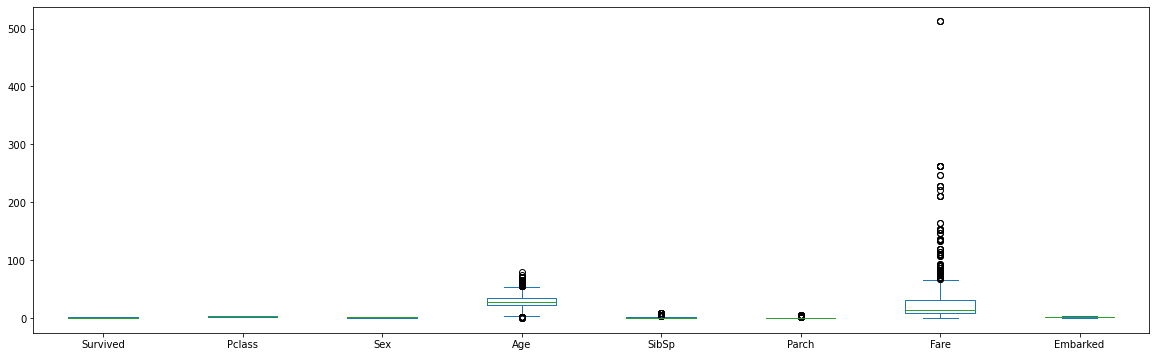

In [20]:
train.plot(kind='box', figsize=(20,6))

In [21]:


#train['NormalizedFare'] = (train.Fare - train.Fare.min()) / (train.Fare.max()- train.Fare.min())
#train.head()


### OK but maybe just later for the next "version" 🌈
Later some improvement can be applied such as **train with normalized/standardized Fare and Age.**</br>
Or **adding another independent variables** such as **title of the passenger** (with some regex🥴),</br>
or something we can determine from the **Ticket** and **Cabin** maybe...

Just like Mark Twain says, it really got me like 🙂

<img style="float: left;" src="https://user-images.githubusercontent.com/111634631/188610723-dfb26c25-1e9c-42d0-a672-027b700b67ce.jpeg">

So, until next time!

I wanna try submitting to Kaggle with **Random Forest** for the classifier, let's see how bad the mark I'll get😬😩

In [22]:
test_preds = rdf.y_result(test)

In [23]:
df = pd.DataFrame({'PassengerId': test_id.values,
                 'Survived': test_preds})

In [24]:
df.to_csv("Kagglesubmission.csv", index=False)